# Import Libraries and Set Options
---

## Import Libraries

In [1]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# If JaveScript is configured and enabled: 
# static images: 
# %matplotlib inline

# interactive images: 
# %matplotlib notebook

In [3]:
# Interactive Data Visualization
# import plotly.express as px

In [4]:
# Python Utilities
# Generate datetime objects from raw timestamps and vice versa
# from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

## Check Prerequisites

In [5]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [6]:
# pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width. Data frames will a big number of columns are extremely slow to output with this option. 

# pd.set_option('float_format', '{:,.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [7]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Scikit-learn Libraries

### Train | Test Split & Pre-Processing

In [8]:
# Split Function (see Signature for correct tuple unpacking)
# from sklearn.model_selection import train_test_split

# Default split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# When perfroming a classic Train | Test Spit fit ONLY to X_train to avoid data leakage! (Follow Procedure described in documentation under Cross Validation and Linear Regression Project)

# Data Scaling (iff values are in different order of magnitude)
# from sklearn.preprocessing import StandardScaler

In [10]:
# k-fold cross validation scores; estimator = ML model, cv = fold value, scoring = error metric (use the ones provided by sklearn!)

# from sklearn.model_selection import cross_val_score

In [11]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
# from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Grid search with cross vadlidation
# from sklearn.model_selection import GridSearchCV

### Linear Models

In [13]:
# Linear Regression Model
# from sklearn.linear_model import LinearRegression

In [14]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 
# from sklearn.linear_model import ElasticNetCV

# Use from sklearn.linear_model import ElasticNet in case CV done manually / grid search

# Standard procedure with no grid search: create X and y, split data, scale data (stadardize)
# Standard procedure with grid search: create X and y, split data, scale data (stadardize), instantiate base model, 

In [15]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)
# from sklearn.linear_model import RidgeCV

# Use from sklearn.linear_model import Ridge in case CV done manually

In [16]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)
# from sklearn.linear_model import LassoCV

# Use from sklearn.linear_model import Lasso in case no CV done manually

### Support Vector Machines

In [17]:
# from sklearn.svm import SVR

# from sklearn.svm import LinearSVC
# faster than the generic version with the caveat that it only has a linear kernel

### Performance Metrics

In [18]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
# from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
# from sklearn.metrics import SCORERS

In [20]:
# Normal Probability Plot
# import scipy as sp

### Model Deployment

In [21]:
# ML Model Deployment 
# from joblib import dump, load

# Instantiate Feature Matrix and Label Vector
---

We read in the final version of the Download data set produced in the Feature Engineering Notebook and analyzed visually in the Preliminary Analysis Notebook. 

We create differenet ML Models, train them on the data set with a Grid Search strategy for Hyperparameter Optimization, and evaluate the Model Performance on a test set. 

In [22]:
df = pd.read_csv('./data/dl-pfe-ns.csv')

In [23]:
df.head()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,...,ci_33527559,ci_33527561,ci_33837570,region_highway,region_suburban,region_urban,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,...,0,0,0,0,0,0,1,0,0,0
1,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,...,0,0,0,0,0,0,1,0,0,0
2,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,...,0,0,0,0,0,0,1,0,0,0
3,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,...,0,0,0,0,0,0,1,0,0,0
4,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# df.columns

In [24]:
len(df)

2118

In [25]:
X = df.drop('throughput',axis=1)

In [26]:
y = df['throughput']

# ML Models
---

## Split Data

We perform a Train | Validation | Test Split. The test size for the initial split is therefore remains smaller than the conventional 33%. 

In [27]:
# from sklearn.model_selection import train_test_split

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [29]:
# X_train.shape

In [30]:
# X_test.shape

## Choosing the Scaler
The features have a variety of scales and units. First, we narrow down on a Scaler with good performance on Linear Regression (based on MAE and RMSE). We try to improve on this initial result. 

It is important to fit ONLY on the train data set to avoid any data leakage. 

In [31]:
# Import Libraries
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Instantiate Scalers
mm_scaler = preprocessing.MinMaxScaler()
rb_scaler = preprocessing.RobustScaler()
st_scaler = preprocessing.StandardScaler()

# Create Scaler List & Empty Scaler String List (for DataFrame)
scalers = [mm_scaler, rb_scaler, st_scaler]
scalers_str = []

# Instantiate Linear Model
model = LinearRegression()

# Create Empty Stats Lists
mean_list = []
mae_list = []
rmse_list = []

# Iterate Scaler List
for s in scalers: 
    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
    
    # Fit Scaler & Transform Data
    s.fit(X_train)
    X_train = s.transform(X_train)
    X_test = s.transform(X_test)
    
    # Fit Model & Predict Label & Append to List
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mean_list.append(y_pred.mean())
    
    # Computer Stats & Append to Lists
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    rmse_list.append(rmse)
    
    # Populate Scaler String List (for DataFrame)
    scalers_str.append(str(s))

In [32]:
# scalers

In [33]:
# mean_list

In [34]:
# mae_list

In [35]:
# rmse_list

In [36]:
scaler_stats = [mean_list, mae_list, rmse_list]

In [37]:
scalers_df = pd.DataFrame(columns=scalers_str, data=scaler_stats, index=['Pred Mean','MAE','RMSE'])

In [44]:
scalers_df
# we favor / choose the RobustScaler() for our ML Models. Linear Regression with Robust Scaling will be our baseline.  

,MinMaxScaler(),RobustScaler(),StandardScaler()
Pred Mean,2.716614e+11,12.834624,4.523093e+10
MAE,2.716614e+11,3.405958,6.985069e+10
RMSE,3.258705e+12,4.506353,8.278009e+11


In [39]:
pd.DataFrame(y.describe()).drop(['count','min','max'], axis=0)

,throughput
mean,13.073617
std,7.080615
25%,7.307607
50%,12.336200
75%,17.923175


In [40]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: grey' if v else '' for v in is_min]

In [106]:
scalers_df.transpose().style.apply(highlight_min)

,Pred Mean,MAE,RMSE
MinMaxScaler(),271661438625.685577,271661438616.203156,3258705297126.703125
RobustScaler(),12.834624,3.405958,4.506353
StandardScaler(),45230934330.852211,69850693326.042099,827800945276.243408


# Baseline Model

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

scaler = preprocessing.RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
    
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [93]:
mae

3.4059583227871135

In [94]:
rmse

4.506353223060181

In [95]:
res = (y_test-y_pred)

In [99]:
res.describe()

count    699.000000
mean       0.168218
std        4.506437
min      -17.293299
25%       -2.930638
50%        0.012543
75%        2.420659
max       19.230379
Name: throughput, dtype: float64

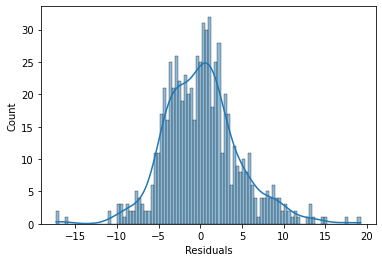

In [97]:
ax = sns.histplot(data=res,bins=100,kde=True)
ax.set(xlabel='Residuals');

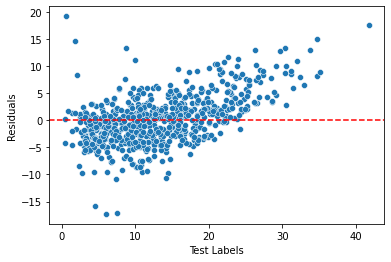

In [98]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Labels')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot

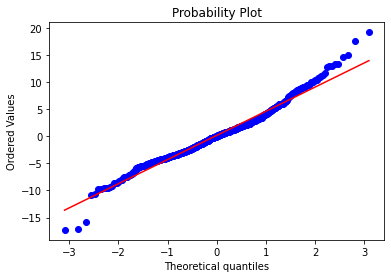

In [102]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [49]:
from sklearn import preprocessing

In [50]:
scaler = preprocessing.StandardScaler()

In [51]:
scaler.fit(X_train)
# be careful of data leakage! Only fit on X_train! 

StandardScaler()

In [52]:
X_train = scaler.transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.437851,1.470759,0.432048,-0.410271,-1.383921,0.010858,-0.359524,0.050570,0.214346,-0.150894,...,-0.059465,-0.065164,-0.026556,-0.640731,-0.821781,2.199888,-0.424891,1.816590,-0.5939,-0.514496
1,-0.065569,-0.193179,0.090280,-0.333207,-1.383921,0.010858,-0.252370,-1.152707,-0.765224,-0.565048,...,-0.059465,-0.065164,-0.026556,-0.640731,1.216869,-0.454569,-0.424891,-0.550482,-0.5939,1.943651
2,0.765820,-1.489769,-0.425497,0.730795,2.724851,-0.027374,1.476154,1.582014,0.704130,1.712803,...,-0.059465,15.346009,-0.026556,1.560716,-0.821781,-0.454569,-0.424891,-0.550482,-0.5939,1.943651
3,-1.002830,1.516381,0.877490,-0.933389,0.260274,0.364499,-1.709711,-0.058819,1.193915,0.573877,...,-0.059465,-0.065164,-0.026556,-0.640731,-0.821781,2.199888,-0.424891,1.816590,-0.5939,-0.514496
4,2.482874,0.474438,-1.350208,0.027382,0.211074,0.010858,-0.790412,1.800792,0.704130,1.091571,...,-0.059465,-0.065164,-0.026556,1.560716,-0.821781,-0.454569,-0.424891,1.816590,-0.5939,-0.514496


In [55]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.072848,-0.189399,0.086584,-0.249182,-1.383921,0.010858,-0.261885,-1.152707,0.214346,-0.357971,...,-0.059465,-0.065164,-0.026556,-0.640731,1.216869,-0.454569,2.353544,-0.550482,-0.5939,-0.514496
1,-0.488663,0.157099,-0.439252,-0.858487,-1.261493,1.004877,-0.759487,-0.386985,-0.275439,0.780955,...,-0.059465,-0.065164,-0.026556,-0.640731,1.216869,-0.454569,-0.424891,1.816590,-0.5939,-0.514496
2,0.786816,-0.720644,1.122781,0.043467,0.085214,0.010858,0.341357,2.347737,1.193915,0.470339,...,-0.059465,-0.065164,-0.026556,-0.640731,1.216869,-0.454569,2.353544,-0.550482,-0.5939,-0.514496
3,-0.821522,0.185833,-0.916575,-0.589605,0.150433,0.010858,0.457486,-1.699652,-0.765224,-0.668587,...,-0.059465,-0.065164,-0.026556,-0.640731,1.216869,-0.454569,2.353544,-0.550482,-0.5939,-0.514496
4,1.755748,-0.350118,-1.461836,-0.297677,1.864423,-1.346361,1.664187,0.269348,-0.765224,-0.565048,...,-0.059465,-0.065164,-0.026556,1.560716,-0.821781,-0.454569,-0.424891,-0.550482,-0.5939,1.943651


# ML Models
--- 
We begin this Section with relatively simple ML models and we increae the complexity in subsequent Sections. 

## Simple Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
df['throughput'].mean()

13.073617070443817

In [62]:
y.mean()

13.073617070443817

In [63]:
y_pred.mean()

31854507025.392616

In [64]:
pd.DataFrame(y_pred).describe()
# note that the 50th percentile is 12.67, but the mean is 4.52*10^10

,0
count,6.990000e+02
mean,3.185451e+10
std,7.145163e+11
min,-7.305260e+12
25%,8.459095e+00
50%,1.269236e+01
75%,1.764781e+01
max,1.418092e+13


In [65]:
len(y_test)

699

In [66]:
mean_absolute_error(y_test,y_pred)

52756538175.07538

In [67]:
# mean_squared_error(y_test,y_pred)

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred))

714715207172.0975

In [69]:
res = (y_test-y_pred)

In [70]:
res.mean()

-31854507012.389763

In [71]:
res.describe()

count    6.990000e+02
mean    -3.185451e+10
std      7.145163e+11
min     -1.418092e+13
25%     -2.943480e+00
50%      6.226390e-03
75%      2.397008e+00
max      7.305260e+12
Name: throughput, dtype: float64

In [72]:
res.sort_values(ascending=False)[abs(res)>y.mean()]
# note that some values are extremly off

1766    7.305260e+12
353     1.920148e+01
1719    1.759192e+01
1745    1.510816e+01
354     1.454532e+01
298     1.342709e+01
829     1.308201e+01
374    -1.587234e+01
507    -1.729512e+01
376    -2.166565e+12
634    -4.324656e+12
1222   -8.899416e+12
315    -1.418092e+13
Name: throughput, dtype: float64

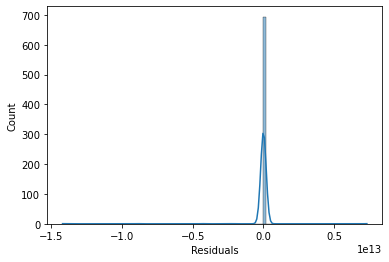

In [73]:
ax = sns.histplot(data=res,bins=100,kde=True)
ax.set(xlabel='Residuals');

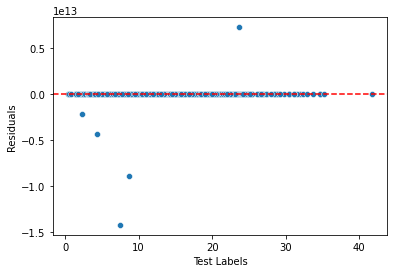

In [74]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Labels')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot

In [75]:
import scipy as sp

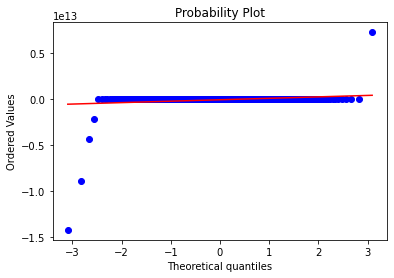

In [76]:
fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

# note that the residuals are not distributed normally and the are extreme outliers -> remove outliers more aggresively/ regularization / other model 

In [77]:
final_model = LinearRegression()

In [78]:
final_model.fit(X,y)

LinearRegression()

In [79]:
coef_df = pd.DataFrame(data=final_model.coef_,index=X.columns,columns=['b_Coeff'])

In [80]:
coef_df.transpose()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,...,ci_33527559,ci_33527561,ci_33837570,region_highway,region_suburban,region_urban,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
b_Coeff,-0.000526,124.998432,39.374307,-0.022046,0.080378,0.08577,-0.000576,0.168804,0.229848,0.040098,...,-3.877941,-8.460709,0.204823,7.205322,0.655514,-7.25349,0.090084,-0.04683,0.028479,0.237415


In [81]:
y_hat = final_model.predict(X)

In [82]:
df_nd = pd.read_csv('./data/dl-final-no-scale-no-dummies.csv')

df_nd_vis = df_nd[['payload', 'rsrp', 'rsrq', 'sinr', 'cqi', 'region','throughput','weekday','hour']]


plt.figure(figsize=(16,16))

sns.set_style('whitegrid')
fig,axes = plt.subplots(nrows=7, ncols=1,figsize=(16,20))

for i, column in enumerate(df_nd_vis.drop(['throughput','region'], axis=1)):
    sns.scatterplot(data=df_nd_vis, x=column, y='throughput', ax=axes[i],alpha=.2)
    sns.scatterplot(data=df_nd_vis, x=column, y=y_hat, ax=axes[i],color='red',alpha=0.2)
    # ax.legend(loc=(1.03,0.5))
    # axes[i].set_title(f'{column.capitalize()}') 

plt.subplots_adjust(hspace = 0.5)

# Note that the region plays a significant role in determining the mean and variance 

FileNotFoundError: [Errno 2] No such file or directory: './data/dl-final-no-scale-no-dummies.csv'

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
train_rmse_errs_list = []
test_rmse_errs_list = []

for d in range(1,4): 
    # create transformation poly_converter:X->X'
    poly_trafo = PolynomialFeatures(degree=d, include_bias=False)
    # store transformed features
    poly_features = poly_trafo.fit_transform(X)
    
    # split the transformed data
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
    # create model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    
    # predict on training data
    train_pred = model.predict(X_train)
    print(train_pred.mean())
    # predict on test data
    test_pred = model.predict(X_test)
    print(test_pred.mean())
    
    
    # generate error statistic
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # append the error statistic to the list
    train_rmse_errs_list.append(train_rmse)
    test_rmse_errs_list.append(test_rmse)
    
# train_rmse_errs_ser = pd.Series(train_rmse_errs_list,index=list(range(1,4)))
# test_rmse_errs_ser = pd.Series(test_rmse_errs_list,index=list(range(1,4)))

In [ ]:
train_rmse_errs_ser = pd.Series(train_rmse_errs_list,index=list(range(1,4)))
test_rmse_errs_ser = pd.Series(test_rmse_errs_list,index=list(range(1,4)))

In [ ]:
train_rmse_errs_ser

In [ ]:
test_rmse_errs_ser

In [ ]:
plt.plot(range(1,4), train_rmse_errs_ser[:5], label='Train RMSE')
plt.plot(range(1,4), test_rmse_errs_ser[:5], label='Test RMSE')


plt.legend(loc='upper left')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

In [ ]:
poly_trafo = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
poly_trafo.fit(X)

In [ ]:
poly_features = poly_trafo.transform(X)

In [ ]:
X.shape

In [ ]:
poly_features.shape

In [ ]:
poly_features_df = pd.DataFrame(poly_features, columns=poly_trafo.get_feature_names(X.columns))

In [ ]:
poly_features_df.head()

In [ ]:
# we do a split with the polynomial features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y.mean()

In [ ]:
y_pred.mean()

In [ ]:
model.coef_

In [ ]:
len(model.coef_)

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
MAE

In [ ]:
MSE

In [ ]:
RMSE

In [ ]:
res = y_test - y_pred

In [ ]:
res.mean()

In [ ]:
ax = sns.histplot(data=res,bins=100,kde=True)
ax.set(xlabel='Residuals');

In [ ]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Labels')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot

In [ ]:
fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

# note that the residuals are not distributed normally and the are extreme outliers -> remove outliers more aggresively/ regularization / other model 

In [ ]:
# or i, feature in enumerate(poly_features_df):
#    print(f'{feature} = {model.coef_[i]:.3f}')

In [ ]:
train_rmse_errs_list = []
test_rmse_errs_list = []

for d in range(1,6): 
    # create transformation poly_converter:X->X'
    poly_trafo = PolynomialFeatures(degree=d, include_bias=False)
    # store transformed features
    poly_features = poly_trafo.fit_transform(X)
    
    # split the transformed data
    X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)
    
    # create model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    
    # predict on training data
    train_pred = model.predict(X_train)
    # predict on test data
    test_pred = model.predict(X_test)
    
    # generate error statistic
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # append the error statistic to the list
    train_rmse_errs_list.append(train_rmse)
    test_rmse_errs_list.append(test_rmse)
    
train_rmse_errs_ser = pd.Series(train_rmse_errs_list,index=list(range(1,10)))
test_rmse_errs_ser = pd.Series(test_rmse_errs_list,index=list(range(1,10)))